In [1]:
###########################################################################################
#     THERE IS A MASSIVE DATA NORMALIZATION PROBLEM IN AT LEAST THE RESULTS DATA SETS     #
###########################################################################################

# define current year and round
thisYr = "2021"
thisRnd = "16"

print("done")

done


In [2]:
# Imports and definitions
import numpy as np
from IPython.display import clear_output
from E2_AnalysisHelpers import *
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import matplotlib.pyplot as plt
from scipy.stats import linregress
from sklearn import datasets

rnds = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13",
        "14", "15", "16", "17", "18", "19", "20", "21", "22", "23", "24", "25"]
yrs = ["2021", "2020"]
# , "2019", "2018", "2017", "2016", "2015", "2014", "2013", "2012", "2011", "2010", "2009", "2008", "2007", "2006"

print("done")

done


In [3]:
# collate all pre-race dataframes, and add column of race finishing positions
pas = "empty"
dF = []

print("--------------------------------\ngetting dataframes and collating\n--------------------------------\n")
for yr in yrs:
    print("   " + yr)
    dF, pas = getWholeFrame(pas, dF, yr)

# add weather
wF = mergeWeather(dF)

clear_output(wait=True)
print("--------------------------------\nsessions and weather merged\n--------------------------------\n")

--------------------------------
sessions and weather merged
--------------------------------



In [4]:
# determine what year was last year and create a dataframe of last years results at the subject track
nf = wF
thisYr = int(thisYr)
thisRnd = int(thisRnd)
recentDF = nf.loc[(nf["yr"] == thisYr) & (nf["rnd"] == thisRnd)]
lstYr = int(thisYr) - 1
thisTrk = recentDF["trk"].iloc[0]

lastDF = nf.loc[(nf["yr"] == lstYr) & (nf["trk"] == thisTrk)]
lstRnds = lastDF.rnd.unique()
lstRnd = lstRnds[-1]
lstRnd

8

In [5]:
files = getFiles(csvFinalDir, f"{lstYr}-MotoGP-Rnd_{lstRnd}-Result.csv")
fullFrame = pd.read_csv(files[-1])
lDF = fullFrame.drop(["run_num", 'index', 'month', 'day', 'f_tire', 'r_tire', 'laps_on_f', 'laps_on_r', 'f_name', 'l_name', 'nat',
                   'num_of_laps', 'avg_spd', 'start_pos', 'one_val', 'two_val', 'thr_val', 'four_val', 'lap_time',
                   'lap_val', 'pit', 'sec_one', 'sec_two', 'sec_thr', 'sec_four', "one_seconds", "two_seconds", "thr_seconds", 
                    "four_seconds"], axis = 1)

lDF = lDF.rename(columns={"fr_scaled": "four_scaled", "thr_scaled": "three_scaled"})

# code is only relevent to yr 2020, rnd 
lDF = lDF[lDF.lap_scaled < .85]
lDF = lDF[lDF.one_scaled < .7]
lDF = lDF[lDF.two_scaled < .56]
lDF = lDF[lDF.three_scaled < .85]
lDF = lDF[lDF.four_scaled < .55]
#################################################

lDF = lDF[lDF["lap_scaled"].notna()]
lDF = lDF[lDF["one_scaled"].notna()]
lDF = lDF[lDF["two_scaled"].notna()]
lDF = lDF[lDF["three_scaled"].notna()]
lDF = lDF[lDF["four_scaled"].notna()]

print("done")

done


In [6]:
lapNums = []
laps = lDF.lap_num.unique()
laps.sort()
nlDF = lDF
for lap in laps[:-1]: lapNums.append(lap)
means = []
xLaps = []

for lap in lapNums:
    lapDF = nlDF.loc[nlDF["lap_num"] == lap]
    lapDF = lapDF[lapDF["lap_seconds"].notna()]

    mean = float(lapDF[["lap_seconds"]].mean())
    means.append(mean)
    xLaps.append(lap)
    print(f"{lap}   {mean}")

clear_output(wait=True)
print("done")

done


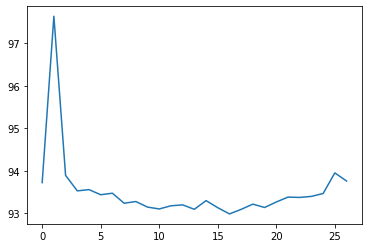

In [7]:
aLaps = np.array(xLaps)
aMeans = np.array(means)

plt.plot(aLaps, aMeans)
plt.show()

In [8]:
################################################################################################################################
# get R value of the track section one

    # r values are hugely dependent on removing outliers
    # this needs to be taken into consideration

sections = ["one", "two", "three", "four"]

for sec in sections:
    nlDF = lDF[lDF.lap_num != 1]

    xVals = nlDF[f"{sec}_scaled"]
    yVals = nlDF["lap_scaled"]

    (slope, intercept, rvalue, pvalue, stderr) = linregress(xVals, yVals)
    print(f"r-squared value of Section {sec.capitalize()} = {rvalue**2}")
# regress_values = xVals * slope + intercept

# plt.scatter(xVals, yVals)
# plt.plot(xVals, regress_values, "r-")
# line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
# plt.annotate(line_eq,(.5,.945),fontsize=15,color="red")

# plt.xlabel(f"Section {sec.capitalize()} performance (section one scaled)")
# plt.ylabel("Over-All Lap Performance (lower is better)")

# fig = plt.gcf()
# fig.set_size_inches(7.5, 5.5)

# plt.show()
################################################################################################################################

# plotting code:
#         nlDF = lDF[lDF.lap_num != 1]
#         sec = "one"

#         xVals = nlDF[f"{sec}_scaled"]
#         yVals = nlDF["lap_scaled"]

#         (slope, intercept, rvalue, pvalue, stderr) = linregress(xVals, yVals)
#         regress_values = xVals * slope + intercept

#         plt.scatter(xVals, yVals)
#         plt.plot(xVals, regress_values, "r-")
#         line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
#         plt.annotate(line_eq,(.5,.945),fontsize=15,color="red")

#         plt.xlabel(f"Section {sec.capitalize()} performance (section one scaled)")
#         plt.ylabel("Over-All Lap Performance (lower is better)")

#         print(f"r-squared value of Section {sec.capitalize()} = {rvalue**2}")
#         fig = plt.gcf()
#         fig.set_size_inches(7.5, 5.5)
#         plt.show()


r-squared value of Section One = 0.6759051899382476
r-squared value of Section Two = 0.5175813416979453
r-squared value of Section Three = 0.5866732188068237
r-squared value of Section Four = 0.5241577144971512


In [9]:
nlDF = lDF[lDF.lap_num != 1]
nlDF = nlDF[nlDF.rnd != 7]
nlDF.groupby("manu", as_index = False)["three_scaled"].mean()

,manu,three_scaled
0,Aprilia,0.811908
1,Ducati,0.808311
2,Honda,0.804270
3,KTM,0.805858
4,Suzuki,0.809687
5,Yamaha,0.804640


In [10]:
# pd.set_option("display.max_rows", None, "display.max_columns", None)

# nF = nFrame.drop(["run_num", "f_tire", "r_tire", "laps_on_f", "laps_on_r", "pit", "lge", "rnd", "trk", "manu", "index",
#                   "month", "day", "yr", "pos", "nat", "num_of_laps", "lap_num", "lap_time", "lap_val", "sec_one", "one_val",
#                   "sec_two", "two_val", "sec_thr", "thr_val", "sec_four", "four_val", "avg_spd"], axis = 1)

# val = {"result": "DNF"}
# xf = nF.fillna(value = val)
# xf = xf[["session", "f_name", "l_name", "rdr_num", "team", "lap_seconds", "lap_scaled", "one_seconds", "one_scaled",
#          "two_seconds", "two_scaled", "thr_seconds", "thr_scaled", "four_seconds", "fr_scaled", "start_pos", "result"]]

# yf = xf.sort_values(by=["session", "result"])

# yf